#Data Preprocessing
created by: Ari Sulistiyo Prabowo

**Objective:** learning data preprocessing to prepare the data before applying any machine learning model

**What will you learn:**
1. Features, predictor & target
2. Data quality
3. Feature encoder
4. Train test split data
5. Imbalanced data
6. Standardization & Normalization



In this notebook, we will use **two differents dataset**, the goal is to work around the data that has so many variation to preprocess the data. They are:
- Car Price
- Human Capital

In [1]:
# import library
import pandas as pd
import numpy as np
from collections import Counter

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## `1.` Feature
Reading the dataset and find the brief information such as **.shape**, **.info**, and **.describe**

In [2]:
# diabetes
car_price = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/car_price.csv")
print("Diabetes data contain {} rows and {} columns \n".format(car_price.shape[0], car_price.shape[1]))
print(car_price.info(), '\n')
display(car_price.describe())
car_price.head()

Diabetes data contain 205 rows and 26 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# human capital
human_cap = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Human%20Capital.csv")
print("Diabetes data contain {} rows and {} columns \n".format(human_cap.shape[0], human_cap.shape[1]))
print(human_cap.info(), '\n')
human_cap.describe()

Diabetes data contain 54808 rows and 13 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB
None 



,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


## `2.` Data Quality
Evaluation the quality of the data using:
- Missing value
- Data duplication

In [4]:
def check_data_quality(input_data):
  """
  Data quality is on the most importent before applying any missing learning model
  Some of ML models are very sensitive towards the missing value, duplicated data and others
  input_data: variable that you save to read the data
  """
  #Shows the result in the percentage of data duplication
  duplication = input_data.duplicated().sum()/input_data.shape[0]*100
  print("There are around {:.2f}% of data duplication \n".format(duplication))

  #Shows the result in the percentage of null value
  type_null = pd.DataFrame(input_data.dtypes).T.rename(index = {0: 'Columns Type'})
  type_null = type_null.append(pd.DataFrame(input_data.isnull().sum()).T.rename(index = {0: 'Amount of Null Values'}))
  type_null = type_null.append(pd.DataFrame(input_data.isnull().sum()/input_data.shape[0]*100).T.rename(index = {0: 'Percentage of Null Values'}))
  
  return(type_null.T)


In [5]:
# Data quality from diabetes dataset
check_data_quality(car_price)

There are around 0.00% of data duplication 



,Columns Type,Amount of Null Values,Percentage of Null Values
car_ID,int64,0,0.0
symboling,int64,0,0.0
CarName,object,0,0.0
fueltype,object,0,0.0
aspiration,object,0,0.0
doornumber,object,0,0.0
carbody,object,0,0.0
drivewheel,object,0,0.0
enginelocation,object,0,0.0
wheelbase,float64,0,0.0


In [6]:
# Data quality from human_capital dataset
check_data_quality(human_cap)

There are around 0.00% of data duplication 



,Columns Type,Amount of Null Values,Percentage of Null Values
employee_id,int64,0,0.0
department,object,0,0.0
region,object,0,0.0
education,object,2409,4.395344
gender,object,0,0.0
recruitment_channel,object,0,0.0
no_of_trainings,int64,0,0.0
age,int64,0,0.0
previous_year_rating,float64,4124,7.524449
length_of_service,int64,0,0.0


## `3.` Feature encoder
In this part, you have to change the non_numeric feature into numeric. You will apply:
- Label encoder
- One-hot encoder

### Label Encoder

In [7]:
def label_encoding(data):
  """
  Let's encode the non_numerical data into a numerical value
  data: your dataset
  """
  
  data_new = data.copy()

  #find non numerical variable/field
  object_data = data_new.select_dtypes(include=['object']).columns.to_list()

  #label encoder object
  label_encoding = LabelEncoder()

  #encode the data into a label
  for i in object_data:
    data_new[i] = label_encoding.fit_transform(data_new[i])

  return data_new

In [8]:
label_encoding(car_price)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
label_encoding(human_cap)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,0,49.0,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,60.0,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,50.0,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,50.0,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,17,0,78.0,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,56.0,0
54805,13918,0,0,0,1,0,1,27,5.0,3,0,79.0,0
54806,13614,7,33,3,1,2,1,29,1.0,2,0,NaN,0


### One Hot Encoder

In [10]:
def one_hot_encoding(data):
  """
  Let's encode the non_numerical data into a numerical value
  data: your dataset
  """

  data_new_one = data.copy()

  #find non numerical variable/field
  object_data = data_new_one.select_dtypes(include=['object']).columns.to_list()

  #apply one-hot encoder
  one_hot_encoded_data = pd.get_dummies(data_new_one, columns = object_data)

  return one_hot_encoded_data

In [11]:
one_hot_encoding(car_price)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [12]:
one_hot_encoding(human_cap)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,0,49.0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,60.0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,50.0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,50.0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,73.0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,78.0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
54804,74592,1,37,2.0,6,0,56.0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
54805,13918,1,27,5.0,3,0,79.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
54806,13614,1,29,1.0,2,0,NaN,0,0,0,...,0,1,0,0,0,0,1,0,0,1


## `4.` Train Test Split

In [13]:
# !pip install imbalanced-learn

In [14]:
X = human_cap.drop('is_promoted', axis=1)
y = human_cap['is_promoted']

In [15]:
#implement train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [16]:
# training data
print('independent variable in the training data contains {} rows and {} columns'.format(X_train.shape[0], X_train.shape[1]))
print('target variable in the training data contains {} rows \n'.format(y_train.shape[0]))

# testing data
print('independent variable in the testing data contains {} rows and {} columns'.format(X_test.shape[0], X_test.shape[1]))
print('target variable in the testing data contains {} rows \n'.format(y_test.shape[0]))

independent variable in the training data contains 43846 rows and 12 columns
target variable in the training data contains 43846 rows 

independent variable in the testing data contains 10962 rows and 12 columns
target variable in the testing data contains 10962 rows 



## `5.` Imbalanced Data


### Over Sampling

In [17]:
human_cap.is_promoted.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [18]:
#set the oversampling
oversample = RandomOverSampler(sampling_strategy=0.5) #set your strategy

#fit the data
X_over, y_over = oversample.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_over))

Counter({0: 40127, 1: 3719})
Counter({0: 40127, 1: 20063})


### Under Sampling

In [19]:
#set the undersampling
undersample = RandomUnderSampler(sampling_strategy=0.5) #set your strategy

#fit the data
X_under, y_under = undersample.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_under))

Counter({0: 40127, 1: 3719})
Counter({0: 7438, 1: 3719})


## `6.` Standardization & Normalization

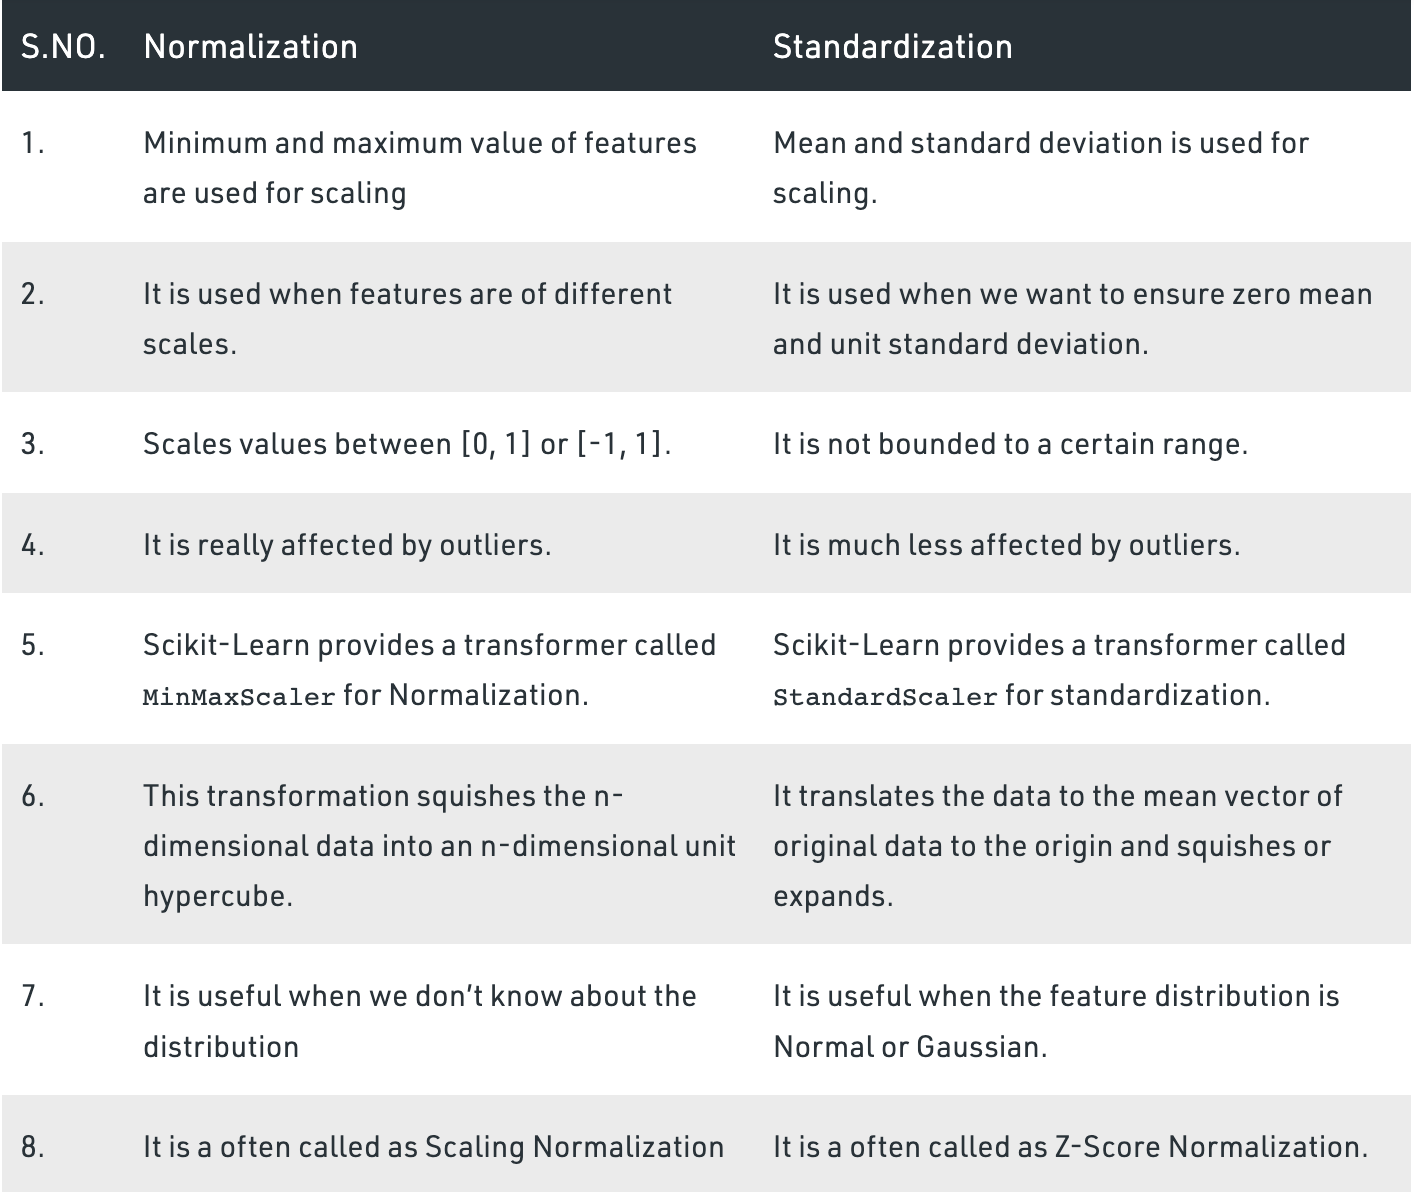

### Standardization
by taking each value of your column, subtracting the mean of the column, and then dividing by the standard deviation of the column

1. Separate the column towards the non numeric dtype and numeric dtype
2. Apply label_encoding/one-hot encoding
3. Separate independent variable and target variable
4. Train test split
5. Separate the X_train and X_test with the non numeric dtype and numeric dtype
6. Create the standardization scaling object.
7. Fit the standardization parameters and scale the data.
8. Result of scaling and transform to dataframe
9. Before concating with the numeric data, reset_index the labeled data
10. Concat the X_train_object and pd_train_sc, and X_test_object with pd_test_sc

In [20]:
# step 1
car_object = car_price.select_dtypes(include=['object']).columns.to_list()
car_numeric = car_price.drop(['price','car_ID','symboling'], axis=1).select_dtypes(include=np.number).columns.to_list()

# step 2
car_label_encod = label_encoding(car_price)

# step 3
X = car_label_encod.drop(['price','car_ID','symboling'], axis=1)
y = car_label_encod['price']

# step 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# step 5
X_train_object = X_train[car_object]
X_train_numeric = X_train[car_numeric]
X_test_object = X_test[car_object]
X_test_numeric = X_test[car_numeric]

# Step 6 
scaler = StandardScaler()

# Step 7 
scaler.fit(X_train_numeric)
train_sc = scaler.transform(X_train_numeric)
test_sc = scaler.transform(X_test_numeric)

# Step 8 
pd_train_sc = pd.DataFrame(train_sc, columns=X_train_numeric.columns)
pd_test_sc = pd.DataFrame(test_sc, columns=X_test_numeric.columns)

# Step 9 
X_train_object = X_train_object.reset_index(drop=True)
X_test_object = X_test_object.reset_index(drop=True)

# Step 10 
X_train_sc = pd.concat([pd_train_sc, X_train_object], axis=1)
X_test_sc = pd.concat([pd_test_sc, X_test_object], axis=1)

### Normalization
With normalizing, data are scaled between 0 and 1 on the training data

1. Separate the column towards the non numeric dtype and numeric dtype
2. Apply label_encoding/one-hot encoding
3. Separate independent variable and target variable
4. Train test split
5. Separate the X_train and X_test with the non numeric dtype and numeric dtype
6. Create the normalization scaling object.
7. Fit the standardization parameters and scale the data.
8. Result of scaling and transform to dataframe
9. Before concating with the numeric data, reset_index the labeled data
10. Concat the X_train_object and pd_train_sc, and X_test_object with pd_test_sc

In [21]:
# step 1
car_object = car_price.select_dtypes(include=['object']).columns.to_list()
car_numeric = car_price.drop(['price','car_ID','symboling'], axis=1).select_dtypes(include=np.number).columns.to_list()

# step 2
car_label_encod = label_encoding(car_price)

# step 3
X = car_label_encod.drop(['price','car_ID','symboling'], axis=1)
y = car_label_encod['price']

# step 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# step 5
X_train_object = X_train[car_object]
X_train_numeric = X_train[car_numeric]
X_test_object = X_test[car_object]
X_test_numeric = X_test[car_numeric]

# Step 6 
scaler = MinMaxScaler()

# Step 7 
scaler.fit(X_train_numeric)
train_mm_sc = scaler.transform(X_train_numeric)
test_mm_sc = scaler.transform(X_test_numeric)

# Step 8 
pd_train_mm_sc = pd.DataFrame(train_mm_sc, columns=X_train_numeric.columns)
pd_test_mm_sc = pd.DataFrame(test_mm_sc, columns=X_test_numeric.columns)

# Step 9 
X_train_object = X_train_object.reset_index(drop=True)
X_test_object = X_test_object.reset_index(drop=True)

# Step 10 
X_train_mm_sc = pd.concat([pd_train_mm_sc, X_train_object], axis=1)
X_test_mm_sc = pd.concat([pd_test_mm_sc, X_test_object], axis=1)

## References

1. [Normalization vs Standardization](https://www.geeksforgeeks.org/normalization-vs-standardization/#:~:text=Usually%2C%20we%20would%20scale%20age,often%20called%20as%20Z%2Dscore.)
2. [Why do we need to re-use training parameters to transform test data?](https://sebastianraschka.com/faq/docs/scale-training-test.html)
3. [One-Hot-Encode categorical variables and scale continuous ones simultaneouely](https://stackoverflow.com/questions/43798377/one-hot-encode-categorical-variables-and-scale-continuous-ones-simultaneouely)
4. [Should I use MinMaxScaler which was fit on train dataset to transform test dataset, or use a separate MinMaxScaler to fit and transform test dataset?](https://stackoverflow.com/questions/62670476/should-i-use-minmaxscaler-which-was-fit-on-train-dataset-to-transform-test-datas#:~:text=So%20the%20answer%20%2D%20yes%2C%20you,%3D10%20and%20min%3D1.)
5. [Do you apply min max scaling separately on training and test data?](https://copyprogramming.com/howto/do-you-apply-min-max-scaling-separately-on-training-and-test-data)